In [1]:
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data = pd.read_csv(r'E:\ExcelR ass\KNN\Zoo.csv')
data.head()
# print(data.shape) (101,18)

(101, 18)


In [6]:
data["type"].unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [8]:
# split data :
x = data.iloc[:,1:17]
# x.head()
y = data.iloc[:,17]

In [9]:
# Grid-Search without applying cross-validation :
import numpy as np
from sklearn.model_selection import GridSearchCV
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid = param_grid)
grid.fit(x,y)
print(grid.best_score_)
grid.best_params_

C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.96


{'n_neighbors': 1}

C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\s

C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


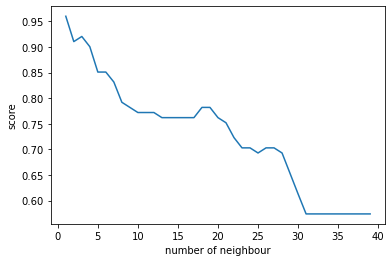

0.96


In [10]:
# kfold cross-validation :
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(1,40)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x, y,)
    k_score.append(scores.mean())
plt.plot(k_range, k_score)
plt.xlabel("number of neighbour")
plt.ylabel("score")
plt.show()
print(max(k_score))

C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=6.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=7.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=8.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\mites\anaconda3\lib\site-packages\s

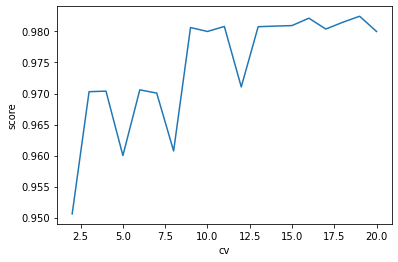

0.9824561403508772


In [11]:
# find best cv value :
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(2,21)
k_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = 1)
    scores = cross_val_score(knn, x, y, cv=k)
    k_score.append(scores.mean())
plt.plot(k_range, k_score)
plt.xlabel("cv")
plt.ylabel("score")
plt.show()
print(max(k_score))

In [36]:
model_1 = KNeighborsClassifier(n_neighbors=1)
result = cross_val_score(model_1, x, y, cv=19)
print("accuracy at k = 1 and cv = 19 is =",result.mean())                         

accuracy at k = 1 and cv = 19 is = 0.9824561403508772


C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=19.
  warnings.warn(("The least populated class in y has only %d"


In [38]:
model_2 = KNeighborsClassifier(n_neighbors=3)
result = cross_val_score(model_2, x, y, cv=19)
print("accuracy at k = 3 and cv = 19 is =",result.mean())                                   

accuracy at k = 3 and cv = 19 is = 0.9561403508771931


C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=19.
  warnings.warn(("The least populated class in y has only %d"


In [39]:
# creating model using train_test_split model validation technique :
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=7)
model = KNeighborsClassifier(1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [40]:
print(np.mean(y_pred == y_test))
pd.crosstab(y_pred, y_test)       # 96.77 testing accuracy.

0.967741935483871


type,1,2,4,5,6,7
row_0,,,,,,
1,12,0,0,0,0,0
2,0,5,0,0,0,0
3,0,0,0,1,0,0
4,0,0,4,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,5,0
7,0,0,0,0,0,3


In [29]:
# gridsearch for train_test_split ;
clf = GridSearchCV(estimator=model, param_grid = param_grid)
clf.fit(x_train, y_train)
print(grid.best_score_)         # 96 % training accuracy
grid.best_params_

C:\Users\mites\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


0.96


{'n_neighbors': 1}

In [30]:
pred = clf.predict(x_test)
pd.crosstab(y_test, pred)
np.mean(y_test == pred)      # 96.77 % test accuracy

0.967741935483871

In [41]:
# model validation : leave-one-out :
from sklearn.model_selection import LeaveOneOut
loocv = LeaveOneOut()
models = [model, model_1, model_2]
std_score = []
accuracy = []
for i in models :
    res = cross_val_score(i, x, y, cv=loocv)
# res.mean()*100
    std_score.append(res.std()*100)
    accuracy.append(res.mean()*100)
print(std_score)
print(accuracy)

[13.931927999475535, 13.931927999475535, 23.638289873887768]
[98.01980198019803, 98.01980198019803, 94.05940594059405]


In [42]:
# from above calculation we can conclude that model_2 has high standard deviaation which leads to model failure 
# model {k = 1} using train_test_split validation technique and model_1{k=1 and cv=19}gives us high accuracy 
# where as , model_2 {k=3 and cv = 19 }is good model.
model_1.fit(x_train, y_train)
y_pred_1 = model_1.predict(x_test)
np.mean(y_pred_1 == y_test)          # 96.77 % testing accuracy

0.967741935483871

In [43]:
model_2.fit(x_train, y_train)
y_pred_2 = model_2.predict(x_test)
np.mean(y_pred_2 == y_test)          # 90.32 % testing accuracy

0.9032258064516129